<a href="https://colab.research.google.com/github/gkolovos/NoisyDataHandling/blob/main/gkolovos_Noisy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## its the second part of the script
## the first part creates noise and null and outliers in a given dataset
## in this part we take as input the first noisy dataset that we created, the out.csv
## the out.csv can be found on https://github.com/gkolovos/kaggleDATAset
## in this part we handle  the outliers and the null valies
## then we upply the Grid Search CV model we created in order the evaluate its metrics


#install pyspark
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import seaborn as sns

In [ ]:
spark = SparkSession.builder.appName('Heart_Disease_pySpark').getOrCreate()
spark

In [ ]:
! git clone https://github.com/gkolovos/kaggleDATAset

fatal: destination path 'kaggleDATAset' already exists and is not an empty directory.


In [ ]:
ls kaggleDATAset

heart.csv  noisy_dataset.csv  noisyfile2.csv  out.csv


In [ ]:
#create spark dataframe
df = spark.read.csv("/content/kaggleDATAset/out.csv", header=True, inferSchema=True )


In [ ]:
df.show()

+---+----+---+-------------+------------------+------------------+---------+----------+------------------+--------------+--------------------+--------+------------+
|_c0| Age|sex|ChestPainType|         RestingBP|       Cholesterol|FastingBS|RestingECG|             MaxHR|ExerciseAngina|             Oldpeak|ST_Slope|HeartDisease|
+---+----+---+-------------+------------------+------------------+---------+----------+------------------+--------------+--------------------+--------+------------+
|  0|39.0|1.0|         0.75|140.07466656670223|289.10286095506933|      0.0|       0.0|172.09099156193284|           0.0|-0.05483643651941964|    0.75|           0|
|  1|49.0|0.0|          0.0|159.99363206516253|179.93671391672518|      0.0|       0.0| 155.9269124561408|           0.0|  1.1095842756681535|     0.0|           1|
|  2|36.0|1.0|         0.75| 129.9314867970465| 283.0786218380064|      0.0|      0.75| 97.97295999999045|           0.0| 0.18289679321606442|    null|           0|
|  3|48.0|

In [ ]:
### metatrepw to spark df se pandas df gia na kanw tis metatropes 

pandasDF = df.toPandas()

In [ ]:
print(pandasDF)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
x_noisy = pandasDF

In [ ]:
######## to teliko dataframe me noise kai outliers kai NaN times ###########################

In [ ]:
print(x_noisy)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
x_noisy.dtypes

_c0                 int32
Age               float64
sex               float64
ChestPainType     float64
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG        float64
MaxHR             float64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease        int32
dtype: object

In [ ]:
print(x_noisy)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
##### mporw na gemisw ta NaN me tis mean h me tis median times
### gia kalyterh apodosh tha tis syplhrwsw xrhsimooiontas ton KNN algorithm

In [ ]:
### dimiourgisa to dataset to opoio exei enthorives times kai pleon yparxoun kai outliners enw exei epishs kai elipeis times

### to epomeno vima einai na epexergastw ta outliners kai tis null times kai na xanatrexw tous algorithmoys gia na sygkrinw ta apotelesmata

In [ ]:
################################################################ detect outliers ##########################################################################

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x_noisy.sample(5)

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
163,163,41.0,1.0,1.0,120.027718,195.948017,0.0,0.0,149.973429,0.0,0.036806,1.00,0
61,61,42.0,NaN,0.0,149.921273,253.987241,0.0,0.0,175.021168,0.0,NaN,0.75,0
476,476,NaN,1.0,0.5,131.930396,217.828231,1.0,1.0,138.970489,0.0,0.236150,0.75,0
507,507,39.0,NaN,0.0,105.893926,239.930957,0.0,0.0,79.986757,1.0,-0.193488,0.75,0
131,131,45.0,1.0,0.5,110.118873,201.990100,0.0,0.0,149.910905,1.0,NaN,0.00,1


In [ ]:
x_noisy.describe()


,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.062954,0.757869,0.447094,132.494580,199.879988,0.231888,0.355562,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.518895,0.428633,0.305501,18.370256,109.438021,0.433680,0.444691,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,28.000000,0.000000,-0.300000,-0.086683,-0.410472,-0.326524,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,77.000000,1.000000,1.000000,200.119664,603.059150,1.264830,1.400000,201.818059,1.264830,6.207822,1.500000,1.000000


In [ ]:
# printing olokliro to dataset

# pd.set_option('display.max_rows', x_noisy.shape[0]+1)
# print(x_noisy)

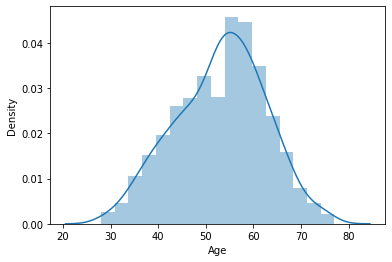

In [ ]:
##  Plot the distribution plot of “Age” feature

sns.distplot(x_noisy['Age'])

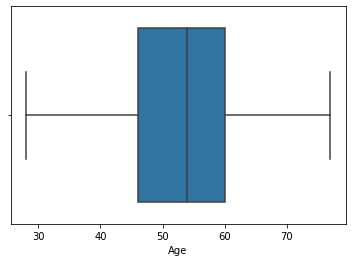

In [ ]:
# Plot the box-plot of “Age” feature

sns.boxplot(x_noisy['Age'])

In [ ]:
print(x_noisy['Age'].quantile(0.50))   ### median timh 

54.0


In [ ]:
#  Finding upper and lower limit

upper_limit = x_noisy['Age'].quantile(0.99)
lower_limit = x_noisy['Age'].quantile(0.01)

In [ ]:
lower_limit

32.0

In [ ]:
upper_limit

74.0

In [ ]:
# Apply trimming

## x_noisy1 = x_noisy[(x_noisy['Age'] <= 73.0) & (x_noisy['Age'] >= 32.0)]

# aytos o tropos diagrafei ta rows me outliers
# egw tha antikathastisw ta outliers me to upper kai lower limit antistoixa

In [ ]:
## second choise
 
## filing outliers with the median timh
# x_noisytest['Age'] = x_noisytest.where(x_noisytest['Age'] > upper_limit, 54.0, x_noisytest['Age'])
# x_noisy.describe()

In [ ]:
## third choise
 
## filing outliers with the upper_limit and lower limit
#x_noisytest['Age'] = x_noisytest.where(x_noisytest['Age'] > upper_limit , 73, x_noisytest['Age'])
#x_noisy.describe()

In [ ]:
x_noisy['Age'] = np.where(x_noisy['Age'] >= upper_limit,
        74.0 ,
        np.where(x_noisy['Age'] <= lower_limit,
        31.0 ,
        x_noisy['Age']))

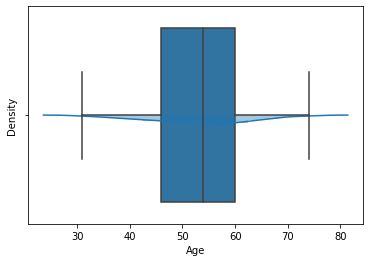

In [ ]:
# Compare the distribution and box-plot after trimming

sns.distplot(x_noisy['Age'])
sns.boxplot(x_noisy['Age'])

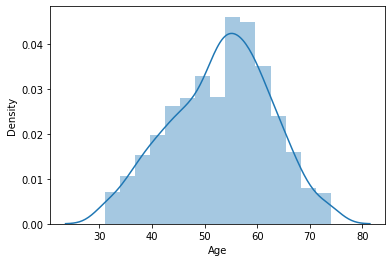

In [ ]:
sns.distplot(x_noisy['Age'])

In [ ]:
x_noisy.groupby(['Age']).size()


Age
31.0    14
33.0     3
34.0     7
35.0     8
36.0    10
37.0    12
38.0    11
39.0    13
40.0    19
41.0    16
42.0    12
43.0    21
44.0    22
45.0    19
46.0    21
47.0    23
48.0    22
49.0    24
50.0    20
51.0    34
52.0    33
53.0    34
54.0    42
55.0    38
56.0    29
57.0    39
58.0    34
59.0    33
60.0    32
61.0    22
62.0    29
63.0    19
64.0    22
65.0    16
66.0    15
67.0    15
68.0     8
69.0     9
70.0     5
71.0     5
72.0     3
73.0     1
74.0    12
dtype: int64

In [ ]:
x_noisy.isna().sum()

_c0                0
Age               92
sex               92
ChestPainType     92
RestingBP         64
Cholesterol       92
FastingBS         64
RestingECG        64
MaxHR             64
ExerciseAngina    92
Oldpeak           64
ST_Slope          64
HeartDisease       0
dtype: int64

In [ ]:
count_nan = len(x_noisy) - x_noisy.count()
count_nan

_c0                0
Age               92
sex               92
ChestPainType     92
RestingBP         64
Cholesterol       92
FastingBS         64
RestingECG        64
MaxHR             64
ExerciseAngina    92
Oldpeak           64
ST_Slope          64
HeartDisease       0
dtype: int64

In [ ]:
print(x_noisy)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
# print all rows

# pd.set_option('display.max_rows', x_noisy.shape[0]+1)
# print(x_noisy)

In [ ]:
# sex

# exw times mono 0 kai 1 opote komple ## einai ok

In [ ]:
# ChestPainType

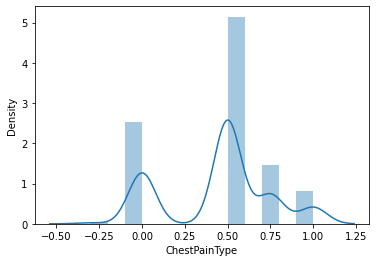

In [ ]:
sns.distplot(x_noisy['ChestPainType'])

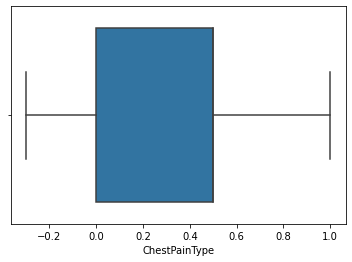

In [ ]:
sns.boxplot(x_noisy['ChestPainType'])

In [ ]:
upper_limit = x_noisy['ChestPainType'].quantile(0.99)
lower_limit = x_noisy['ChestPainType'].quantile(0.05)

In [ ]:
upper_limit

1.0

In [ ]:
lower_limit

0.0

In [ ]:
x_noisy['ChestPainType'] = np.where(x_noisy['ChestPainType'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['ChestPainType'] <= lower_limit,
        lower_limit,
        x_noisy['ChestPainType']))

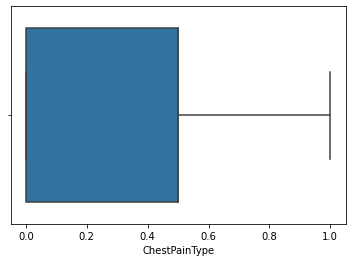

In [ ]:
#sns.distplot(x_noisyNum2['ChestPainType'])
sns.boxplot(x_noisy['ChestPainType'])

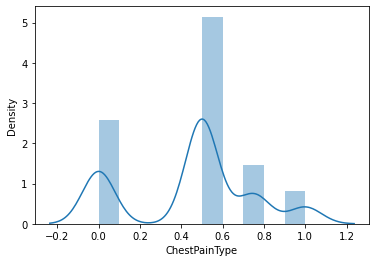

In [ ]:
sns.distplot(x_noisy['ChestPainType'])

In [ ]:
x_noisy.groupby(['ChestPainType']).size()

ChestPainType
0.00    213
0.50    425
0.75    120
1.00     68
dtype: int64

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.494580,199.879988,0.231888,0.355562,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,18.370256,109.438021,0.433680,0.444691,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,-0.086683,-0.410472,-0.326524,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,200.119664,603.059150,1.264830,1.400000,201.818059,1.264830,6.207822,1.500000,1.000000


In [ ]:
# RestingBP

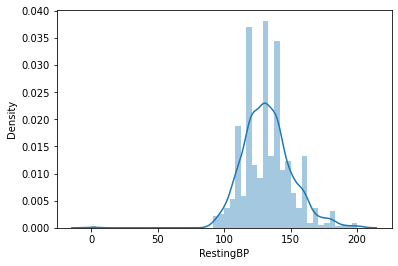

In [ ]:
sns.distplot(x_noisy['RestingBP'])

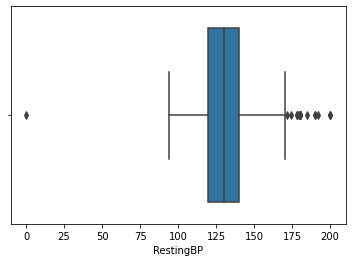

In [ ]:
sns.boxplot(x_noisy['RestingBP'])

In [ ]:
upper_limit = x_noisy['RestingBP'].quantile(0.99)
lower_limit = x_noisy['RestingBP'].quantile(0.01)

In [ ]:
lower_limit

95.65066949915553

In [ ]:
upper_limit

180.00226638605966

In [ ]:
x_noisy['RestingBP'] = np.where(x_noisy['RestingBP'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['RestingBP'] <= lower_limit,
        lower_limit,
        x_noisy['RestingBP']))

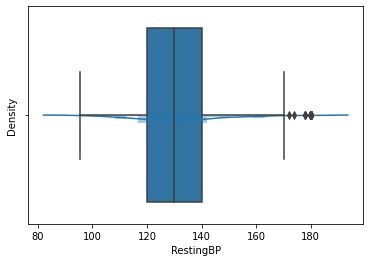

In [ ]:
sns.distplot(x_noisy['RestingBP'])
sns.boxplot(x_noisy['RestingBP'])

In [ ]:
##### tha mporousa na to xanatrexw kialles fores wste na mn deixnei katholou outliers alla kai pali einai arketo 

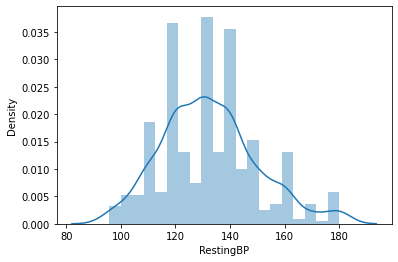

In [ ]:
sns.distplot(x_noisy['RestingBP'])

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,199.879988,0.231888,0.355562,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,109.438021,0.433680,0.444691,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,-0.410472,-0.326524,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,603.059150,1.264830,1.400000,201.818059,1.264830,6.207822,1.500000,1.000000


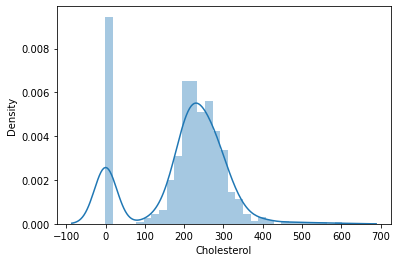

In [ ]:
# Cholesterol

sns.distplot(x_noisy['Cholesterol'])

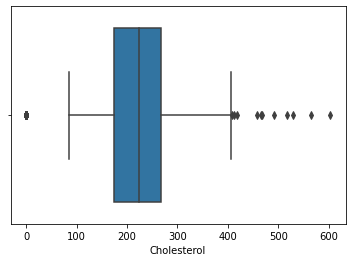

In [ ]:
sns.boxplot(x_noisy['Cholesterol'])

In [ ]:
upper_limit = x_noisy['Cholesterol'].quantile(0.99)
lower_limit = x_noisy['Cholesterol'].quantile(0.10)

In [ ]:
upper_limit

415.8748675430006

In [ ]:
lower_limit

0.007346373249550592

In [ ]:
x_noisy['Cholesterol'] = np.where(x_noisy['Cholesterol'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['Cholesterol'] <= lower_limit,
        lower_limit,
        x_noisy['Cholesterol']))

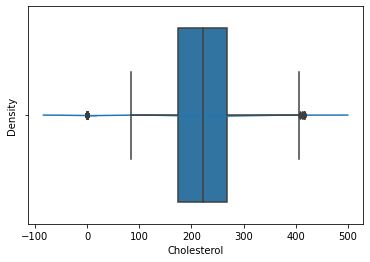

In [ ]:
sns.distplot(x_noisy['Cholesterol'])
sns.boxplot(x_noisy['Cholesterol'])

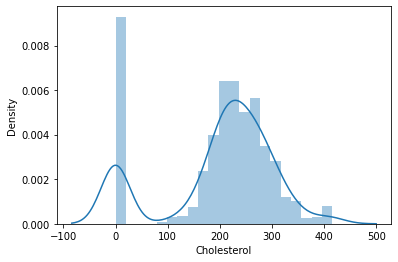

In [ ]:
sns.distplot(x_noisy['Cholesterol'])

In [ ]:
x_noisy.groupby(['Cholesterol']).size()

Cholesterol
0.007346      83
0.007689       1
0.007944       1
0.008885       1
0.011309       1
              ..
403.980347     1
407.008257     1
408.889861     1
412.003649     1
415.874868     9
Length: 736, dtype: int64

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.231888,0.355562,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.433680,0.444691,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,-0.326524,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.264830,1.400000,201.818059,1.264830,6.207822,1.500000,1.000000


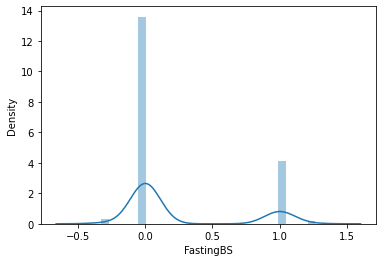

In [ ]:
## FastingBS

sns.distplot(x_noisy['FastingBS'])

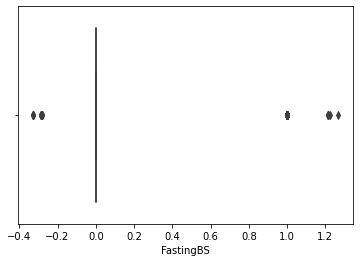

In [ ]:
sns.boxplot(x_noisy['FastingBS'])

In [ ]:
upper_limit = x_noisy['FastingBS'].quantile(0.90)
lower_limit = x_noisy['FastingBS'].quantile(0.10)

In [ ]:
lower_limit

0.0

In [ ]:
upper_limit

1.0

In [ ]:
x_noisy['FastingBS'] = np.where(x_noisy['FastingBS'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['FastingBS'] <= lower_limit,
        lower_limit,
        x_noisy['FastingBS']))

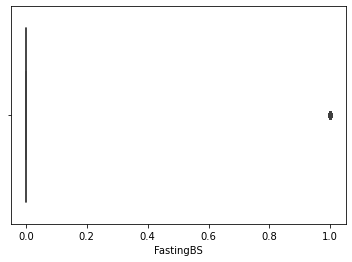

In [ ]:
#sns.distplot(x_noisy['FastingBS'])
sns.boxplot(x_noisy['FastingBS'])

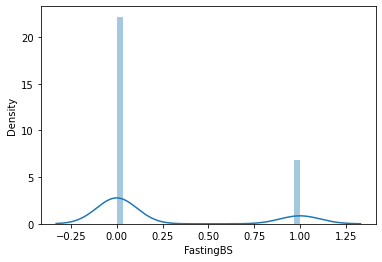

In [ ]:
sns.distplot(x_noisy['FastingBS'])

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355562,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.444691,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.400000,201.818059,1.264830,6.207822,1.500000,1.000000


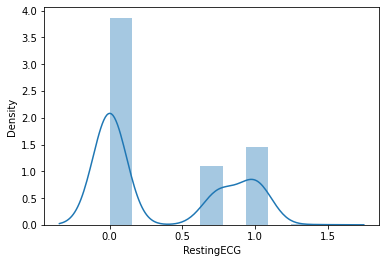

In [ ]:
## RestingECG

sns.distplot(x_noisy['RestingECG'])

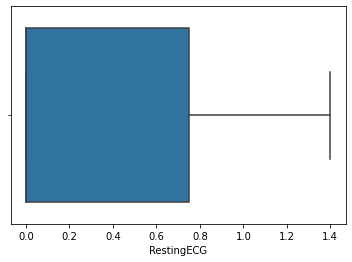

In [ ]:
sns.boxplot(x_noisy['RestingECG'])

In [ ]:
upper_limit = x_noisy['RestingECG'].quantile(0.99)
lower_limit = x_noisy['RestingECG'].quantile(0.01)

In [ ]:
upper_limit

1.0

In [ ]:
lower_limit

0.0

In [ ]:
x_noisy['RestingECG'] = np.where(x_noisy['RestingECG'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['RestingECG'] <= lower_limit,
        lower_limit,
        x_noisy['RestingECG']))

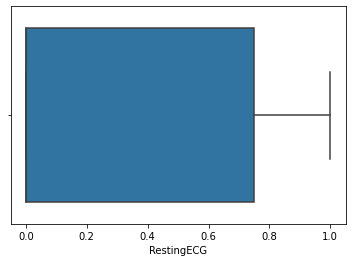

In [ ]:
#sns.distplot(x_noisy['RestingECG'])
sns.boxplot(x_noisy['RestingECG'])

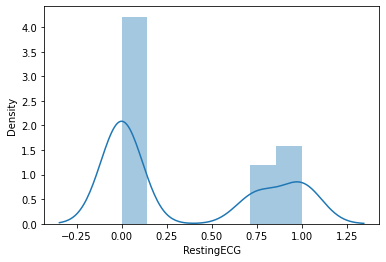

In [ ]:
sns.distplot(x_noisy['RestingECG'])

In [ ]:
x_noisy.groupby(['RestingECG']).size()


RestingECG
0.00    514
0.75    147
1.00    193
dtype: int64

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.833748,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.492954,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,59.877794,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,201.818059,1.264830,6.207822,1.500000,1.000000


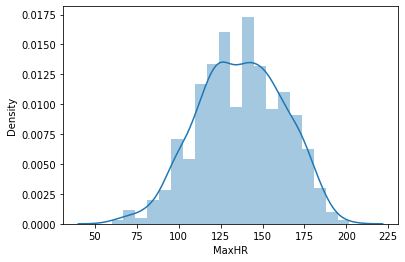

In [ ]:
### MaxHR

sns.distplot(x_noisy['MaxHR'])

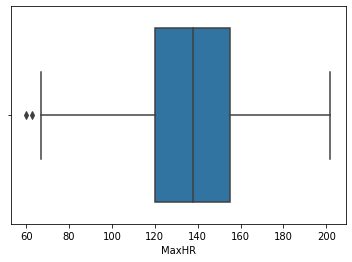

In [ ]:
sns.boxplot(x_noisy['MaxHR'])

In [ ]:
upper_limit = x_noisy['MaxHR'].quantile(0.99)
lower_limit = x_noisy['MaxHR'].quantile(0.01)

In [ ]:
lower_limit

75.73833482641126

In [ ]:
upper_limit

186.52894179580431

In [ ]:
x_noisy['MaxHR'] = np.where(x_noisy['MaxHR'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['MaxHR'] <= lower_limit,
        lower_limit,
        x_noisy['MaxHR']))

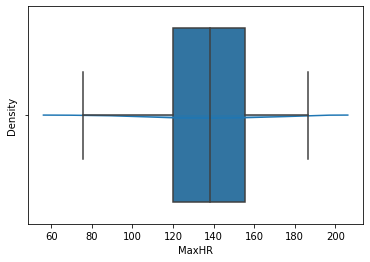

In [ ]:
sns.distplot(x_noisy['MaxHR'])
sns.boxplot(x_noisy['MaxHR'])

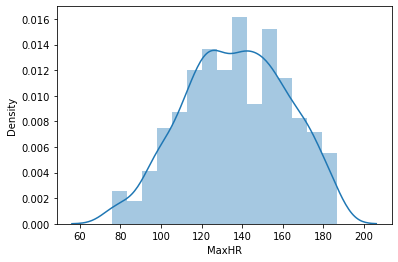

In [ ]:
sns.distplot(x_noisy['MaxHR'])

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.854579,0.397165,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.176195,0.497133,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,-0.287943,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,186.528942,1.264830,6.207822,1.500000,1.000000


In [ ]:
## ExerciseAngina

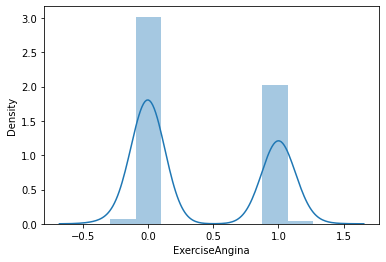

In [ ]:
sns.distplot(x_noisy['ExerciseAngina'])

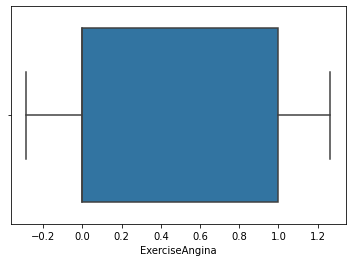

In [ ]:
sns.boxplot(x_noisy['ExerciseAngina'])

In [ ]:
upper_limit = x_noisy['ExerciseAngina'].quantile(0.95)
lower_limit = x_noisy['ExerciseAngina'].quantile(0.05)

In [ ]:
lower_limit

0.0

In [ ]:
upper_limit

1.0

In [ ]:
x_noisy['ExerciseAngina'] = np.where(x_noisy['ExerciseAngina'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['ExerciseAngina'] <= lower_limit,
        lower_limit,
        x_noisy['ExerciseAngina']))

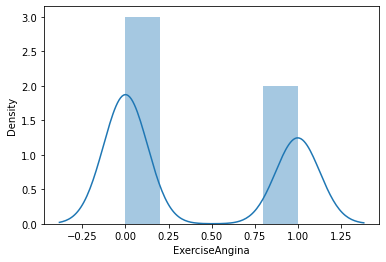

In [ ]:
sns.distplot(x_noisy['ExerciseAngina'])
#sns.boxplot(x_noisy['ExerciseAngina'])

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.854579,0.399516,0.902828,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.176195,0.490096,1.079759,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,0.000000,-2.557557,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,186.528942,1.000000,6.207822,1.500000,1.000000


In [ ]:
## Oldpeak

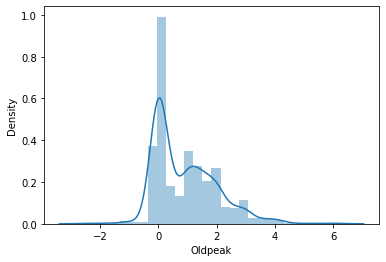

In [ ]:
sns.distplot(x_noisy['Oldpeak'])

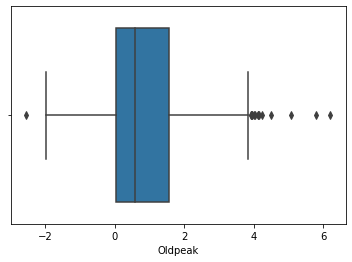

In [ ]:
sns.boxplot(x_noisy['Oldpeak'])

In [ ]:
upper_limit = x_noisy['Oldpeak'].quantile(0.99)
lower_limit = x_noisy['Oldpeak'].quantile(0.01)

In [ ]:
lower_limit

-0.6509815737576696

In [ ]:
upper_limit

4.023983061554084

In [ ]:
x_noisy['Oldpeak'] = np.where(x_noisy['Oldpeak'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['Oldpeak'] <= lower_limit,
        lower_limit,
        x_noisy['Oldpeak']))

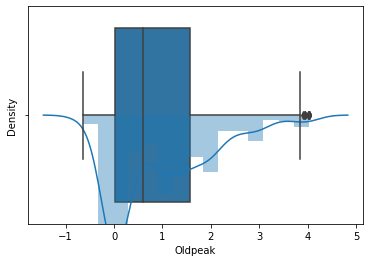

In [ ]:
sns.distplot(x_noisy['Oldpeak'])
sns.boxplot(x_noisy['Oldpeak'])

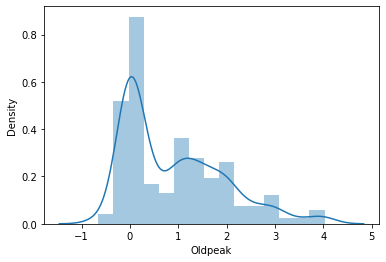

In [ ]:
sns.distplot(x_noisy['Oldpeak'])

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.854579,0.399516,0.902860,0.312096,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.176195,0.490096,1.039089,1.999111,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,0.000000,-0.650982,-40.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,186.528942,1.000000,4.023983,1.500000,1.000000


In [ ]:
# ST_Slope

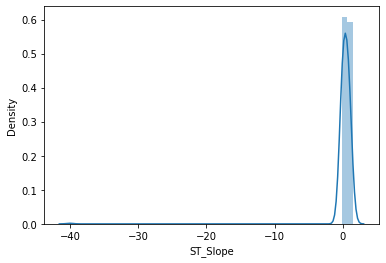

In [ ]:
sns.distplot(x_noisy['ST_Slope'])

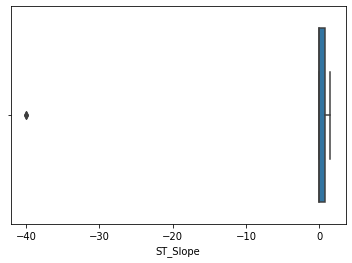

In [ ]:
sns.boxplot(x_noisy['ST_Slope'])

In [ ]:
upper_limit = x_noisy['ST_Slope'].quantile(0.99)
lower_limit = x_noisy['ST_Slope'].quantile(0.01)

In [ ]:
lower_limit

0.0

In [ ]:
upper_limit

1.0

In [ ]:
x_noisy['ST_Slope'] = np.where(x_noisy['ST_Slope'] >= upper_limit,
        upper_limit,
        np.where(x_noisy['ST_Slope'] <= lower_limit,
        lower_limit,
        x_noisy['ST_Slope']))

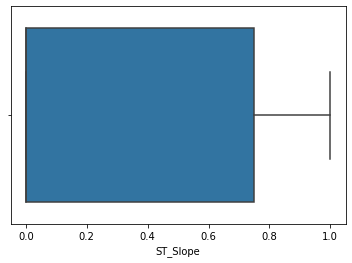

In [ ]:
#sns.distplot(x_noisy['ST_Slope'])
sns.boxplot(x_noisy['ST_Slope'])

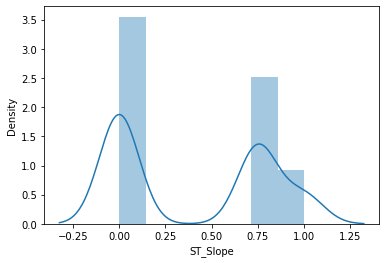

In [ ]:
sns.distplot(x_noisy['ST_Slope'])

In [ ]:
x_noisy.groupby(['ST_Slope']).size()

ST_Slope
0.00    433
0.75    308
1.00    113
dtype: int64

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.854579,0.399516,0.902860,0.402810,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.176195,0.490096,1.039089,0.416094,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,0.000000,-0.650982,0.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,186.528942,1.000000,4.023983,1.000000,1.000000


In [ ]:
print(x_noisy)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
#### outliers have been removed 

In [ ]:
## twra prepei na antikathistisw tis NaN times 

In [ ]:
##################################3####  Replace NaN times ##########################################

In [ ]:
#### fill NaN values 

In [ ]:
print(x_noisy)

     _c0   Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.0  1.0           0.75  140.074667   289.102861        0.0   
1      1  49.0  0.0           0.00  159.993632   179.936714        0.0   
2      2  36.0  1.0           0.75  129.931487   283.078622        0.0   
3      3  48.0  0.0           0.50  137.856413   213.981550        0.0   
4      4  54.0  1.0           0.00  149.905604   195.281793        0.0   
..   ...   ...  ...            ...         ...          ...        ...   
913  913  44.0  1.0            NaN  109.942225          NaN        0.0   
914  914  67.0  1.0           0.50  143.945443          NaN        1.0   
915  915  57.0  1.0           0.50  129.981999   130.934711        0.0   
916  916   NaN  0.0           1.00  129.971256   235.883080        0.0   
917  917  37.0  1.0           0.00  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0          0.00  172.090992    

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,826.000000,826.000000,826.000000,854.000000,826.000000,854.000000,854.000000,854.000000,826.000000,854.000000,854.000000,918.000000
mean,458.500000,53.060533,0.757869,0.448547,132.501474,198.954924,0.235363,0.355094,136.854579,0.399516,0.902860,0.402810,0.553377
std,265.148072,9.471423,0.428633,0.302641,17.469139,107.032165,0.424474,0.443800,25.176195,0.490096,1.039089,0.416094,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,0.000000,-0.650982,0.000000,0.000000
25%,229.250000,46.000000,1.000000,0.000000,120.002061,174.905043,0.000000,0.000000,119.924836,0.000000,0.022781,0.000000,0.000000
50%,458.500000,54.000000,1.000000,0.500000,130.077703,222.930355,0.000000,0.000000,137.982217,0.000000,0.594403,0.000000,1.000000
75%,687.750000,60.000000,1.000000,0.500000,140.140184,268.028952,0.000000,0.750000,155.269524,1.000000,1.561761,0.750000,1.000000
max,917.000000,74.000000,1.000000,1.000000,180.002266,415.874868,1.000000,1.000000,186.528942,1.000000,4.023983,1.000000,1.000000


In [ ]:
## ftiaxnw to testdf gia na kanw test on how to fill NaN values
# testdf1 = x_noisy

In [ ]:
# print(testdf1)

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# testdf = pd.DataFrame(imputer.fit_transform(testdf),columns = testdf.columns)

In [ ]:
x_noisy.isna().any()

_c0               False
Age                True
sex                True
ChestPainType      True
RestingBP          True
Cholesterol        True
FastingBS          True
RestingECG         True
MaxHR              True
ExerciseAngina     True
Oldpeak            True
ST_Slope           True
HeartDisease      False
dtype: bool

In [ ]:
# There are different ways to handle missing data. Some methods such as removing the entire observation if it has a missing value or replacing 
# the missing values with mean, median or mode values. However, these methods can waste valuable data or reduce the variability of your dataset. 
# In contrast, KNN Imputer maintains the value and variability of your datasets and yet it is more precise and efficient than using the average 
# values.

In [ ]:
### https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
    
    
imputer = KNNImputer(n_neighbors=6)
imputer.fit_transform(x_noisy)

array([[ 0.00000000e+00,  3.90000000e+01,  1.00000000e+00, ...,
        -5.48364365e-02,  7.50000000e-01,  0.00000000e+00],
       [ 1.00000000e+00,  4.90000000e+01,  0.00000000e+00, ...,
         1.10958428e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  3.60000000e+01,  1.00000000e+00, ...,
         1.82896793e-01,  3.75000000e-01,  0.00000000e+00],
       ...,
       [ 9.15000000e+02,  5.70000000e+01,  1.00000000e+00, ...,
         1.19284772e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.16000000e+02,  5.21666667e+01,  0.00000000e+00, ...,
         2.29871469e-02,  0.00000000e+00,  1.00000000e+00],
       [ 9.17000000e+02,  3.70000000e+01,  1.00000000e+00, ...,
         1.92221619e-01,  1.00000000e+00,  0.00000000e+00]])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    

categorical = [ 'sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina' , 'ST_Slope']                  
numerical = ['Age', 'Cholesterol', 'RestingBP',  'MaxHR', 'Oldpeak']                  

x_noisy[categorical] = x_noisy[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

# επομενως στα αριθμιτικά το mean και στα υπολοιπα το most frequent
imp_num = IterativeImputer(estimator=RandomForestRegressor(),initial_strategy='mean',max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent',max_iter=10, random_state=0)
    
x_noisy[numerical] = imp_num.fit_transform(x_noisy[numerical])
x_noisy[categorical] = imp_cat.fit_transform(x_noisy[categorical])

In [ ]:
print(x_noisy)

     _c0    Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.00  1.0            2.0  140.074667   289.102861        0.0   
1      1  49.00  0.0            0.0  159.993632   179.936714        0.0   
2      2  36.00  1.0            2.0  129.931487   283.078622        0.0   
3      3  48.00  0.0            1.0  137.856413   213.981550        0.0   
4      4  54.00  1.0            0.0  149.905604   195.281793        0.0   
..   ...    ...  ...            ...         ...          ...        ...   
913  913  44.00  1.0            1.0  109.942225   196.247062        0.0   
914  914  67.00  1.0            1.0  143.945443   219.771702        1.0   
915  915  57.00  1.0            1.0  129.981999   130.934711        0.0   
916  916  44.93  0.0            3.0  129.971256   235.883080        0.0   
917  917  37.00  1.0            0.0  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           0.0  17

In [ ]:
x_noisy.describe()

,_c0,Age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,458.500000,53.023617,0.770153,1.038126,132.413631,198.609473,0.224401,0.604575,136.831513,0.413943,0.900679,0.608932,0.553377
std,265.148072,9.111281,0.420964,0.835203,16.984665,102.980449,0.417415,0.824556,24.576520,0.492807,1.010258,0.697876,0.497414
min,0.000000,31.000000,0.000000,0.000000,95.650669,0.007346,0.000000,0.000000,75.738335,0.000000,-0.650982,0.000000,0.000000
25%,229.250000,47.000000,1.000000,0.000000,120.019168,171.069294,0.000000,0.000000,119.965657,0.000000,0.037163,0.000000,0.000000
50%,458.500000,54.000000,1.000000,1.000000,130.095305,220.085107,0.000000,0.000000,137.889854,0.000000,0.693103,0.000000,1.000000
75%,687.750000,59.000000,1.000000,1.000000,140.074547,263.983747,0.000000,1.000000,154.925186,1.000000,1.525916,1.000000,1.000000
max,917.000000,74.000000,1.000000,3.000000,180.002266,415.874868,1.000000,2.000000,186.528942,1.000000,4.023983,2.000000,1.000000


In [ ]:
print(x_noisy)

     _c0    Age  sex  ChestPainType   RestingBP  Cholesterol  FastingBS  \
0      0  39.00  1.0            2.0  140.074667   289.102861        0.0   
1      1  49.00  0.0            0.0  159.993632   179.936714        0.0   
2      2  36.00  1.0            2.0  129.931487   283.078622        0.0   
3      3  48.00  0.0            1.0  137.856413   213.981550        0.0   
4      4  54.00  1.0            0.0  149.905604   195.281793        0.0   
..   ...    ...  ...            ...         ...          ...        ...   
913  913  44.00  1.0            1.0  109.942225   196.247062        0.0   
914  914  67.00  1.0            1.0  143.945443   219.771702        1.0   
915  915  57.00  1.0            1.0  129.981999   130.934711        0.0   
916  916  44.93  0.0            3.0  129.971256   235.883080        0.0   
917  917  37.00  1.0            0.0  138.114228   174.903332        0.0   

     RestingECG       MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           0.0  17

In [ ]:
x_noisy.groupby(['ChestPainType']).size()

ChestPainType
0.0    233
1.0    487
2.0    128
3.0     70
dtype: int64

In [ ]:
x_noisy.to_csv("/content/kaggleDATAset/noisyfile2.csv",index=False)

In [ ]:
dfn = spark.read.csv("/content/kaggleDATAset/noisyfile2.csv", header=True, inferSchema=True )

In [ ]:
dfn.show()

+---+-----+---+-------------+------------------+------------------+---------+----------+------------------+--------------+--------------------+--------+------------+
|_c0|  Age|sex|ChestPainType|         RestingBP|       Cholesterol|FastingBS|RestingECG|             MaxHR|ExerciseAngina|             Oldpeak|ST_Slope|HeartDisease|
+---+-----+---+-------------+------------------+------------------+---------+----------+------------------+--------------+--------------------+--------+------------+
|  0| 39.0|1.0|          2.0|140.07466656670223|289.10286095506933|      0.0|       0.0|172.09099156193284|           0.0|-0.05483643651941964|     1.0|           0|
|  1| 49.0|0.0|          0.0|159.99363206516253|179.93671391672518|      0.0|       0.0| 155.9269124561408|           0.0|  1.1095842756681535|     0.0|           1|
|  2| 36.0|1.0|          2.0| 129.9314867970465| 283.0786218380064|      0.0|       1.0| 97.97295999999045|           0.0| 0.18289679321606442|     1.0|           0|
|  3

In [ ]:
#### tha valw to dataset a trexei st model pou eftiaxa na dw apodwsei

In [ ]:
train_data2,validation_test2 = dfn.randomSplit([0.8,0.2],seed=100)
validation2, test2 = validation_test2.randomSplit([0.5, 0.5], seed = 4)

In [ ]:
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.feature import Bucketizer, RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, NGram, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, NaiveBayes,DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LinearSVC

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=[
 'sex',
 'Age',
 'RestingBP',
 'Oldpeak',
 'ExerciseAngina',
 'RestingECG',
 'FastingBS',
 'ST_Slope',
 'MaxHR',
 'Cholesterol',
 'ChestPainType'],outputCol='features')

In [ ]:
# Import libraries
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline, PipelineModel

pipeline = Pipeline(stages=[])

basePipeline =[assembler]

In [ ]:
#lr = LogisticRegression(labelCol="HeartDisease", featuresCol="features", maxIter=20)
lr = LogisticRegression(maxIter=10,labelCol='HeartDisease',featuresCol='features')
pipeline_LR = basePipeline + [lr]
pg_lr = (ParamGridBuilder()
          .baseOn({pipeline.stages: pipeline_LR})
          .addGrid(lr.regParam,[0.01, .08])
          .addGrid(lr.elasticNetParam,[0.1, 0.8])
          .build())

rf = RandomForestClassifier(labelCol='HeartDisease',featuresCol='features',numTrees=50)
pl_rf = basePipeline + [rf]
pg_rf = (ParamGridBuilder()
      .baseOn({pipeline.stages: pl_rf})
      .addGrid(rf.numTrees, [3, 10])
      .build())

lsvcCV = LinearSVC(maxIter=10,regParam=0.1,featuresCol="features", labelCol='HeartDisease')
pl_lsvc = basePipeline + [lsvcCV]
pg_lsvc = (ParamGridBuilder()
       .baseOn({pipeline.stages: pl_rf})
       .addGrid(lsvcCV.regParam, [0.01,0.1,10.0,100.0])
       .addGrid(lsvcCV.maxIter, [10, 100, 1000])
       .build())

# gbtCV = GBTClassifier(labelCol='HeartDisease',featuresCol='features' , maxIter=30, maxDepth=3)
# pipeline_gbtCV = basePipeline + [gbtCV]

# Set the Parameters grid
# pg_gbt = (ParamGridBuilder()
#              .baseOn({pipeline.stages: pipeline_gbtCV}) 
#              .addGrid(gbtCV.maxDepth, [2, 5])
#              .addGrid(gbtCV.maxIter, [10, 30])
#              .build())


# dtc = DecisionTreeClassifier(labelCol='HeartDisease',featuresCol='features', maxDepth=3)
# pl_dtc= basePipeline + [dtc]
# pg_dtc = (ParamGridBuilder()
#        .baseOn({pipeline.stages: pl_dtc})
#        .addGrid(dtc.maxDepth, [4, 5, 6, 7])
#        .addGrid(dtc.maxBins, [24, 28, 32, 36])
#        .build())




 

# nb = NaiveBayes(labelCol='HeartDisease',featuresCol='features')
# pl_nb = basePipeline + [nb]
# pg_nb = (ParamGridBuilder()
# .baseOn({pipeline.stages: pl_nb})
# .addGrid(nb.smoothing,[0.8,1.0])
# .build())




In [ ]:
paramGrid =pg_rf+pg_lr+pg_lsvc

In [ ]:
cvMM = (CrossValidator()
      .setEstimator(pipeline)
      .setEvaluator(MulticlassClassificationEvaluator(labelCol="HeartDisease", predictionCol="prediction", metricName="accuracy"))
      .setEstimatorParamMaps(paramGrid)
      .setNumFolds(10))

In [ ]:
cvModel = cvMM.fit(train_data2)

In [ ]:
predictionsMM = cvModel.transform(validation_test2)


In [ ]:
predictionsMM.groupBy("prediction").count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|   75|
|       1.0|   98|
+----------+-----+



In [ ]:
from sklearn.metrics import roc_curve , auc
from pyspark.ml.functions import vector_to_array

#https://stackoverflow.com/questions/52847408/pyspark-extract-roc-curve


predictionsMM=cvModel.transform(validation_test2)
y_score = predictionsMM.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()   
y_true = predictionsMM.select("HeartDisease").rdd.keys().collect()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = auc(fpr, tpr)

In [ ]:
print("Area under ROC Curve: {:.4f}".format(auc))

Area under ROC Curve: 0.9167


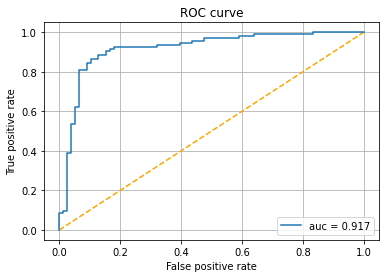

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0,1], [0,1], 'k--', color='orange')
plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#accuracy

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_evaluator = MulticlassClassificationEvaluator(labelCol="HeartDisease", predictionCol="prediction", metricName="accuracy")

MM_acc = acc_evaluator.evaluate(predictionsMM)
print("MM accuracy: {:.4f}".format(MM_acc*100))

MM accuracy: 87.8613


In [ ]:
# use MulticlassClassificationEvaluator to get f1 scores
evaluator1 = MulticlassClassificationEvaluator(labelCol="HeartDisease")

# use BinaryClassificationEvaluator to get area under PR curve
evaluator2 = BinaryClassificationEvaluator( rawPredictionCol="prediction", labelCol="HeartDisease")

# make evaluation and print f1 and area under PR score per model
f1 = evaluator1.evaluate(predictionsMM, {evaluator1.metricName:'f1'})
print("F1 score on validation: {:.4f} ".format(f1))

pr = evaluator2.evaluate(predictionsMM, {evaluator2.metricName:'areaUnderPR'})
print("Area under PR on validation set: {:.4f} ".format(pr))

F1 score on validation: 0.8784 
Area under PR on validation set: 0.8620 


In [ ]:
### ta apotelesmata pou eixe vgalei to modelo me to grid st dataset xwris thoryvo kai NaN times kai xwris outliers
### oi opoies htan kai oi kalyteres

# auc :       0.94
# accuracy :  88.9
# f1 :        0.89
# PR :        89.3